In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import h_key
from api_keys import f_key
from api_keys import n_key


# Output File (CSV)
output_data_file = "output_data/hotel.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

### API Calls

In [2]:
# Create project dataframe (cities)
city_df = pd.read_csv("./Resources/Airport_Output.csv")
city_df.dropna(inplace = True) 
city_df.head()


,Unnamed: 0,City,State,Lat,Lng,Airport Name,Airport Address,Airport Rating,Airport Code
0,0,New York City,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR
1,1,Los Angeles,California,34.052234,-118.243685,Los Angeles International Airport,"1 World Way, Los Angeles",3.5,LAX
2,2,Chicago,Illinois,41.878114,-87.629798,O'Hare International Airport,"10000 W O'Hare Ave, Chicago",3.6,ORD
3,3,Houston,Texas,29.760427,-95.369803,William P. Hobby Airport,"7800 Airport Blvd, Houston",4.0,HOU
4,4,Philadelphia,Pennsylvania,39.952584,-75.165222,Philadelphia International Airport,"8000 Essington Ave, Philadelphia",3.3,PHL


In [3]:
merged_data_path = ("./merged_data.csv")
merged_data_df = pd.read_csv("./merged_data.csv")
merged_data_df.head()


,Unnamed: 0,City,State_x,Lat,Lng,Airport Name,Airport Address,Airport Rating,Airport Code,Cheapest_Outbound_Airfare,Cheapest_Return_Airfare,Hotel,Rating,State_y,Country,Price,location,name,rating,review_count
0,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Artezen Hotel,4.0,NY,us,87.12,New York,Brooklyn Bridge,4.5,1398.0
1,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,World Center Hotel,4.0,NY,us,79.20,New York,Brooklyn Bridge,4.5,1398.0
2,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Fairfield Inn & Suites by Marriott/World Trade...,3.0,NY,us,69.30,New York,Brooklyn Bridge,4.5,1398.0
3,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Holiday Inn Express New York City- Wall Street,3.0,NY,us,74.25,New York,Brooklyn Bridge,4.5,1398.0
4,0.0,New York,New York,40.712775,-74.005973,Newark Liberty International Airport,"3 Brewster Rd, Newark",3.2,EWR,109.0,117.0,Aloft Manhattan Downtown - Financial District,3.0,NY,us,68.40,New York,Brooklyn Bridge,4.5,1398.0


In [4]:
mean = merged_data_df.groupby('location')['review_count'].mean()

bar_chart_df = pd.DataFrame({"Mean": mean})
                             
        
bar_chart_df

,Mean
location,
Albuquerque,155.0
Anaheim,50.0
Anchorage,179.0
Arlington,203.0
Atlanta,86.0
...,...
Tulsa,169.0
Virginia Beach,127.0
Washington,64.0


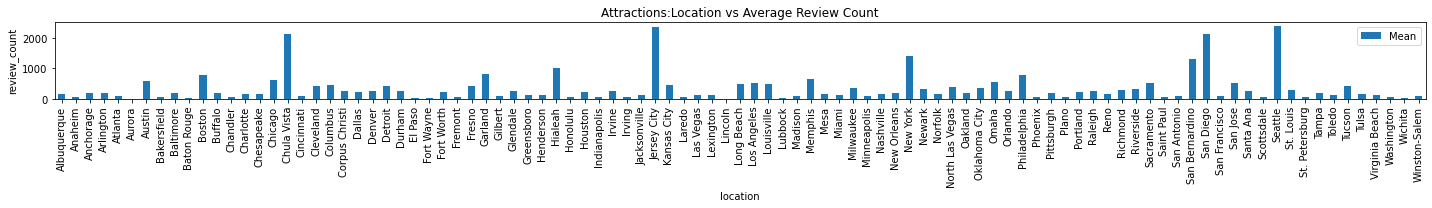

In [5]:
# Chart our data, give it a title, and label the axes
attraction_chart = bar_chart_df.plot(kind="bar",figsize=(20,3), title="Attractions:Location vs Average Review Count")
attraction_chart.set_xlabel("location")
attraction_chart.set_ylabel("review_count")


plt.tight_layout()
plt.savefig("Barchart_Attraction.png")
plt.show()

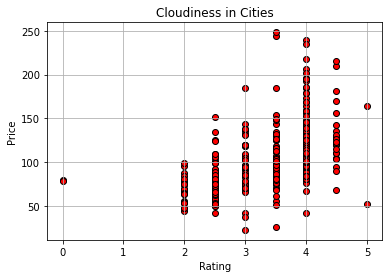

In [6]:
plt.scatter(merged_data_df["Rating"],merged_data_df["Price"], marker="o", color="red",edgecolor="black")
plt.title("Cloudiness in Cities")
plt.ylabel("Price")
plt.xlabel("Rating")
plt.grid(True)


The r-squared is: nan


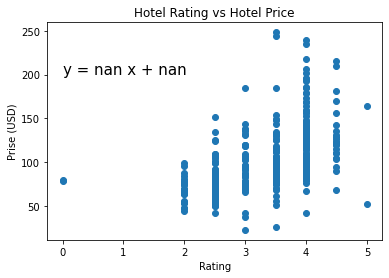

In [7]:
x_values = merged_data_df["Rating"]
y_values = merged_data_df["Price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,200),fontsize=15)
plt.title("Hotel Rating vs Hotel Price")
plt.xlabel("Rating")
plt.ylabel("Prise (USD)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Hotel Regression.png")
plt.show()

In [8]:
weather_df = pd.read_csv("./city_weather_data.csv")
weather_df.head()

,city,lat,lng,dateTime,sunrise,sunset,pressure,humidity,wind_speed (MPH),low_temp (degF),high_temp (degF),descriptor
0,New York City,40.712775,-74.005973,11-Mar-2021,(06:13:55.000000),(17:58:13.000000),1024,46,9.31,43.79,64.15,Clouds
1,New York City,40.712775,-74.005973,12-Mar-2021,(06:12:16.000000),(17:59:17.000000),1021,34,8.55,46.45,60.03,Rain
2,New York City,40.712775,-74.005973,13-Mar-2021,(06:10:38.000000),(18:00:22.000000),1028,22,8.08,32.49,48.34,Clear
3,New York City,40.712775,-74.005973,14-Mar-2021,(07:08:59.000000),(19:01:26.000000),1016,36,17.85,34.50,52.54,Clear
4,New York City,40.712775,-74.005973,15-Mar-2021,(07:07:20.000000),(19:02:30.000000),1029,12,5.59,26.19,41.88,Clear


In [9]:
mean = merged_data_df.groupby('State_y')['Price'].mean()
median = merged_data_df.groupby('State_y')['Price'].median()
variance = merged_data_df.groupby('State_y')['Price'].var()
standard_dv = merged_data_df.groupby('State_y')['Price'].std()
sem = merged_data_df.groupby('State_y')['Price'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
State_y,,,,,
AZ,100.312083,90.115,1497.563000,38.698359,7.899269
CA,93.237143,86.475,1067.216075,32.668273,4.365482
CHIH,54.100000,54.100,552.448800,23.504229,16.620000
CO,95.683750,93.465,311.885455,17.660279,6.243852
DC,106.202500,110.850,621.056650,24.921008,8.810907
FL,121.927500,118.150,1681.513136,41.006257,14.497901
GA,99.905000,93.840,756.119171,27.497621,9.721877
IL,79.385000,75.940,373.909257,19.336733,6.836568
IN,130.435556,138.000,3536.828728,59.471243,19.823748


In [10]:

airport_code=[]
cheapestTicketPrice=[]

#outbound trip call
#for index, row in city_df.iterrows():
    #code = row['Airport Code']
    #originplace='BWI'
    #destinationplace=code
    #departure_date="2021-03-15"
    #base_url = "https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/browsequotes/v1.0/US/USD/en-US/"
    #tags=originplace + "-sky/" + destinationplace + "-sky/" + departure_date
    #url=base_url + tags
    #print(url)
    #querystring = {"inboundpartialdate":"2021-03-19"}

    #headers = {
        #'x-rapidapi-key': "e5ee88badfmsh65ec7588e95e6fcp181b1cjsn38212393a000",
        #'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com"
        #}
    #try:
        #response = requests.request("GET", url, headers=headers, params=querystring)
        #response=response.json()
        #airport_code.append(code)
        #cheapestTicketPrice.append(response['Quotes'][0]['MinPrice'])
    #except:
        #cheapestTicketPrice.append('nan')


In [11]:
#city_df['Cheapest_Outbound_Airfare']=cheapestTicketPrice

In [12]:
#airport_code=[]
#cheapestTicketPrice=[]
#return trip
#for index, row in city_df.iterrows():
    #code = row['Airport Code']
    #destinationplace='IAD'
    #originplace=code
    #departure_date="2021-03-19"
    #base_url = "https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/browsequotes/v1.0/US/USD/en-US/"
    #tags=originplace + "-sky/" + destinationplace + "-sky/" + departure_date
    #url=base_url + tags
    #print(url)
    #querystring = {"inboundpartialdate":"2021-03-19"}

    #headers = {
        #'x-rapidapi-key': "e5ee88badfmsh65ec7588e95e6fcp181b1cjsn38212393a000",
        #'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com"
        #}
    #try:
        #response = requests.request("GET", url, headers=headers, params=querystring)
        #response=response.json()
        #airport_code.append(code)
        #cheapestTicketPrice.append(response['Quotes'][0]['MinPrice'])
    #except:
        #cheapestTicketPrice.append('nan')

In [13]:
#city_df['Cheapest_Return_Airfare']=cheapestTicketPrice
#city_df



In [14]:
#Kayla API LOOP
#counter = 0
#cities = []
#results=[]

    

#For loop
#for city,item in city_df.iterrows():
    #counter=counter+1  
    #print(item)
    #try:
        #url = "https://hotels-com-free.p.rapidapi.com/srle/listing/v1/brands/hotels.com"
        #print(item["Lat"],item["Lng"]) 
        #querystring = {"lat":item["Lat"],"lon":item["Lng"],"checkIn":"2021-03-15","checkOut":"2021-03-19","rooms":"2","locale":"en_US","currency":"USD","pageNumber":"1"}

        #headers = {
        #'x-rapidapi-key': h_key,
        #'x-rapidapi-host': "hotels-com-free.p.rapidapi.com"
        #}

        #response = requests.request("GET", url, headers=headers, params=querystring)

        #response = response.json()
    
#Reading the length of each ref
        #nh = len(response['data']['body']['searchResults']['results'])

       #for i in range(nh):

            #Hotel = response['data']['body']['searchResults']['results'][i]['name']
            #Rating = response['data']['body']['searchResults']['results'][i]['starRating']
            #City = response['data']['body']['searchResults']['results'][i]['address']['locality']
            #State = response['data']['body']['searchResults']['results'][i]['address']['region']
            #Country =response['data']['body']['searchResults']['results'][i]['address']['countryCode']
            #Stay_Rate = response['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
            
            #results.append([Hotel, Rating,City, State, Country,Stay_Rate])
            
            #time.sleep(2)
            
    #except:
        
        #print("Hotel Data Not Found")
   
               
#print(results)


In [15]:
#hotel_df = pd.DataFrame(results,columns=["Hotel","Rating","City", "State", "Country","Price"])

#hotel_df.to_csv('HOTEL_API.csv', index=False)

#hotel_df

In [16]:
#nichole api
#locations = city_df['City'].values.tolist()

In [17]:
# TODO(uwana): Use your key here. Get it from yelp.com/developers
#api_key= n_key
#headers = {'Authorization': 'Bearer %s' % api_key}
# Using the business search API.
#url='https://api.yelp.com/v3/businesses/search'
#locations
# https://www.yelp.com/developers/documentation/v3/business_search
# All the attractions data
#attractions = []
# Making a get request to the API for each location
#for location in locations:
  # Use query paramaters that conform to the API: https://www.yelp.com/developers/documentation/v3/business_search
  #params = {'term': 'attractions', 'location': location, 'limit': 1, 'sort_by': 'rating'}
  #req = requests.get(url, params=params, headers=headers)
  #data = json.loads(req.text)
  #businesses = data['businesses']
  #for business in businesses:
    #business_info = {'location': location, 'name': business['name'], 'rating': business['rating'],
                    #'review_count': business['review_count']}
    #attractions.append(business_info)
#attractions_json = json.dumps(attractions)
#print(attractions_json)

In [18]:
#yelp_df = pd.DataFrame(attractions)
#yelp_df.head(100)